# Análise de resíduos
Índice <a name="topo"></a>

1. [Padrão esperado de resíduos](#1)
2. [Padrão côncavo](#2)
3. [Padrão convexo](#3)
4. [Padrão de variância crescente](#4)
5. [Transformações em x](#5)
6. [Transformação na variável resposta](#6)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.formula.api as smf
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

### 1. Padrão esperado de resíduos<a name="1"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

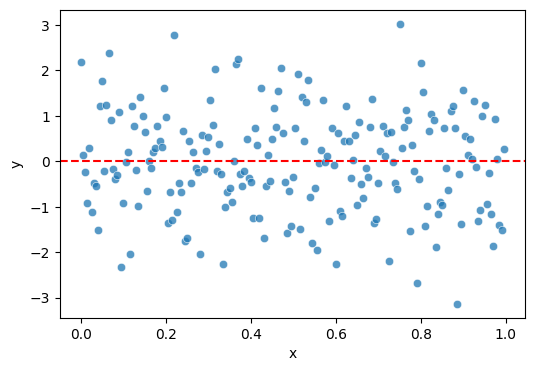

In [2]:
df = pd.DataFrame({'y':np.random.randn(200), 'x':np.arange(0,1,.005)})

sns.scatterplot(x = 'x', y = 'y', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

### 2. Padrão côncavo<a name="2"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

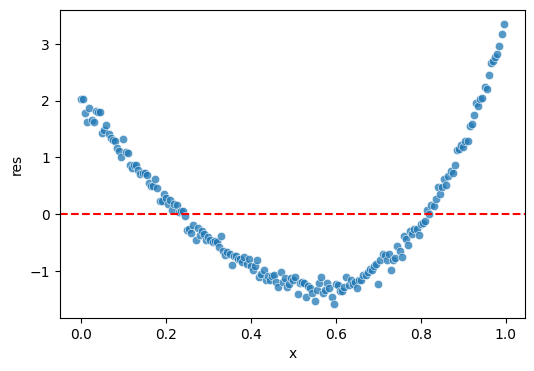

In [3]:
df['y'] = np.exp(2.5*(df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.1
df['y'] = df['y'] - df['y'].mean()

reg = smf.ols('y ~ x', data = df).fit()
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='x', ylabel='y'>

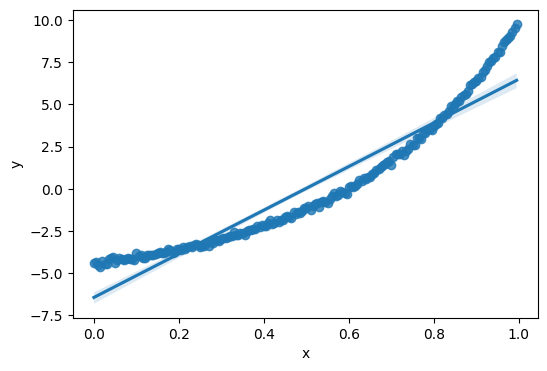

In [4]:
sns.regplot(x = 'x', y = 'y', data = df)

### 3. Padrão convexo<a name="3"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

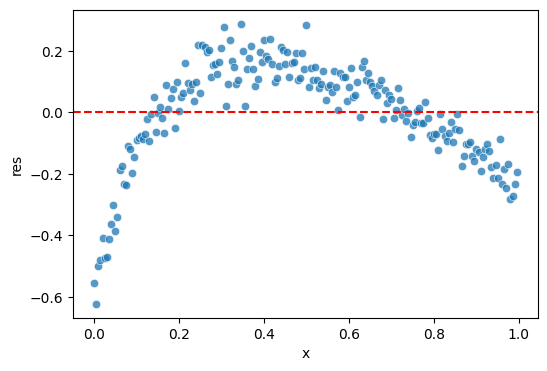

In [5]:
df['y'] = np.log((df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.05
df['y'] = df['y'] - df['y'].mean()

reg = smf.ols('y ~ x', data = df).fit()
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')



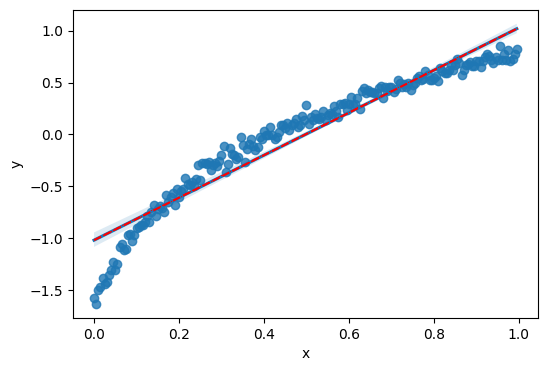

In [6]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

### 4. Padrão de variância crescente<a name="4"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

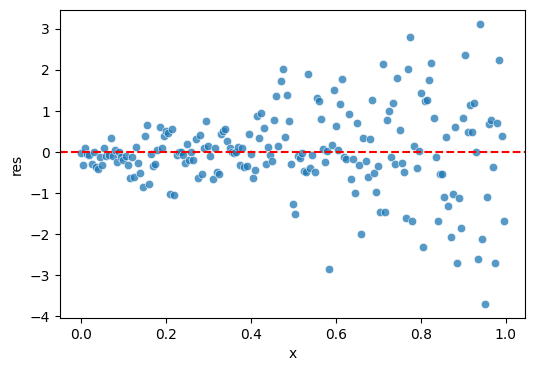

In [7]:
df['y'] = 5*(df['x']-(df['x'].min()-.1)) + (df['x']-(df['x'].min()-.1))*np.random.randn(200)*1.5

reg = smf.ols('y ~ x', data = df).fit()
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='x', ylabel='y'>

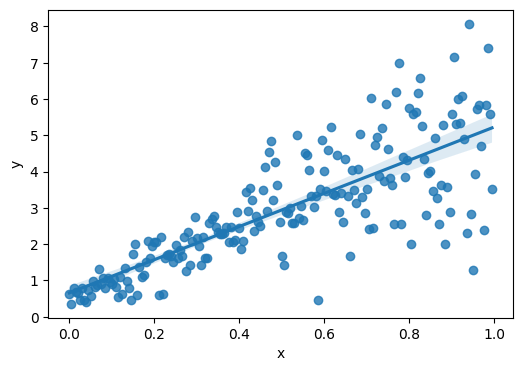

In [8]:
sns.regplot(x = 'x', y = 'y', data = df)

### 5. Transformações em x<a name="5"></a>
<div style="text-align: right"
     
[Voltar ao índice](#topo)</div>
    
Uma forma de buscar um melhor ajuste em uma regressão com padrão de relação não linear entre x e y é buscar uma função g(x) que linearize essa relação. Dentre as opções, podemos tentar:
- categorizar x
- ajustar um polinômio
- transformar por uma função log, exponencial, raiz etc.

<Axes: xlabel='x', ylabel='y'>

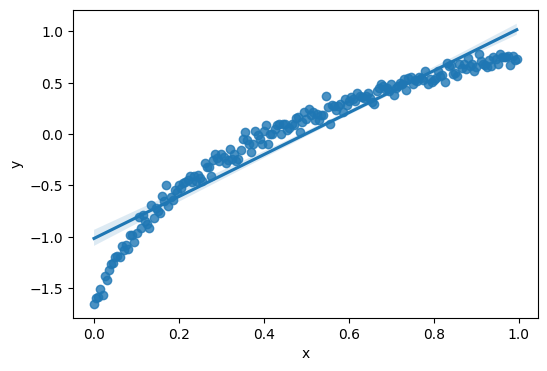

In [9]:
df['y'] = np.log((df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.05
df['y'] = df['y'] - df['y'].mean()
sns.regplot(x = 'x', y = 'y', data = df)

A regressão com a variável ```x``` "crua" resulta em padrâo convexo nos resíduos

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2083.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.79e-107
Time:                        20:45:17   Log-Likelihood:                 57.314
No. Observations:                 200   AIC:                            -110.6
Df Residuals:                     198   BIC:                            -104.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0157      0.026    -39.480      0.0

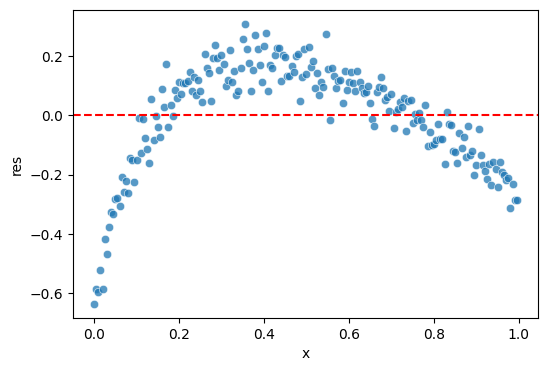

In [10]:
reg = smf.ols('y ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


#### Ajustando um polinômio de segundo grau

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5320.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.69e-172
Time:                        20:45:17   Log-Likelihood:                 213.64
No. Observations:                 200   AIC:                            -421.3
Df Residuals:                     197   BIC:                            -411.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.3715      0.018    -77.

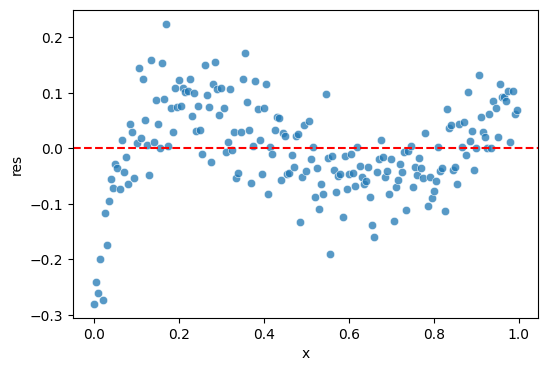

In [11]:
reg = smf.ols('y ~ x + np.power(x,2)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

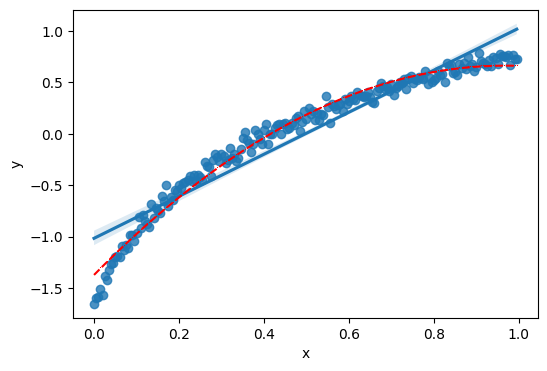

In [12]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

#### Ajustando uma função exponencial

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1025.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           3.12e-80
Time:                        20:45:18   Log-Likelihood:                -5.0084
No. Observations:                 200   AIC:                             14.02
Df Residuals:                     198   BIC:                             20.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9720      0.064    -30.784      0.0

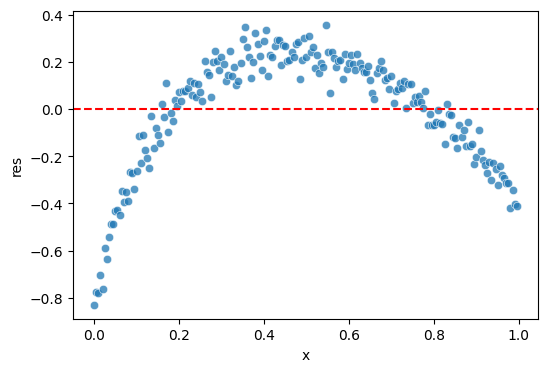

In [13]:
reg = smf.ols('y ~ np.exp(x)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

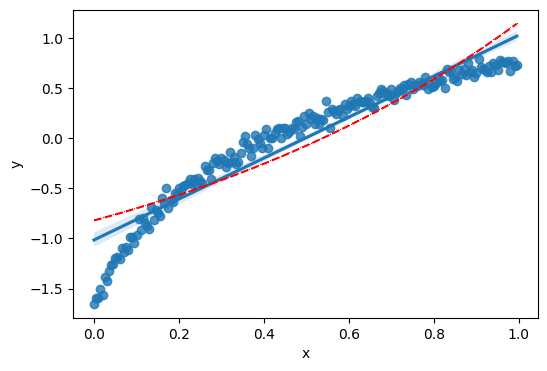

In [14]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

#### Ajustando uma função logaritmica

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.839e+04
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          9.18e-216
Time:                        20:45:18   Log-Likelihood:                 310.13
No. Observations:                 200   AIC:                            -616.3
Df Residuals:                     198   BIC:                            -609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6753      0.005    124.

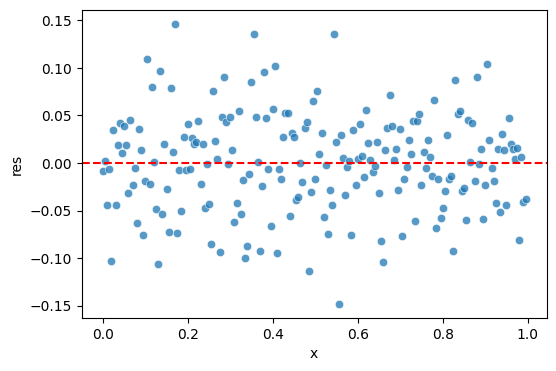

In [15]:
reg = smf.ols('y ~ np.log(x+.1)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

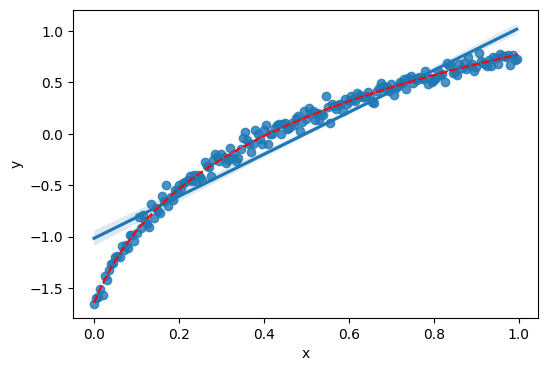

In [16]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

### 6. Transformação na variável resposta<a name="6"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

<Axes: xlabel='x', ylabel='y'>

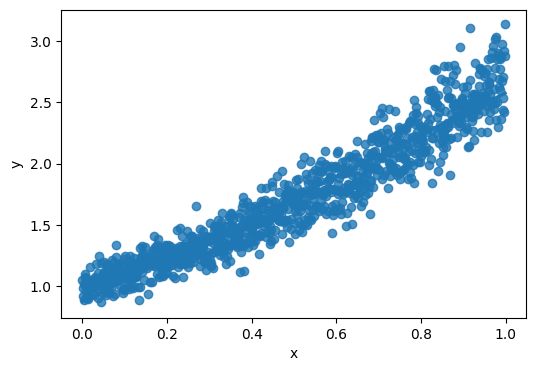

In [17]:
x = np.arange(0,1,.001)
df = pd.DataFrame({'y':np.exp(x + np.random.randn(1000)*.08), 'x':x})

sns.regplot(x = 'x', y = 'y', data = df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     9871.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:45:19   Log-Likelihood:                 436.51
No. Observations:                1000   AIC:                            -869.0
Df Residuals:                     998   BIC:                            -859.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8724      0.010     88.189      0.0

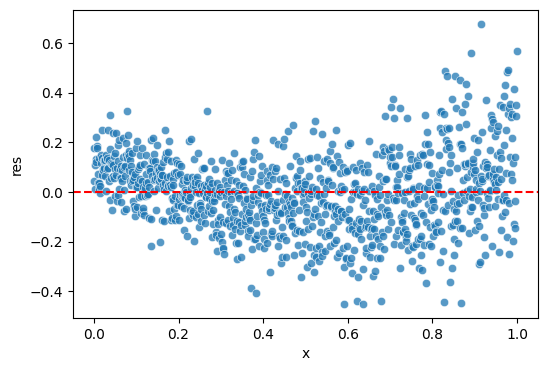

In [18]:
reg = smf.ols('y ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [19]:
# outra forma de calcular o R^2
df['pred'] = reg.fittedvalues

r = df[['pred', 'y']].corr().iloc[0,1]

In [20]:
r**2

0.9081781716255891

#### Log na variável resposta usando o Patsy

                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.304e+04
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:45:19   Log-Likelihood:                 1102.6
No. Observations:                1000   AIC:                            -2201.
Df Residuals:                     998   BIC:                            -2191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0031      0.005     -0.605      0.5

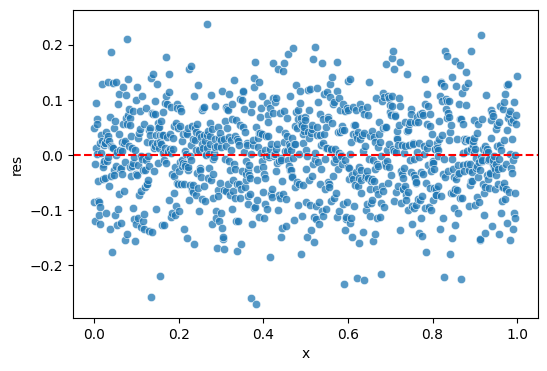

In [21]:
reg = smf.ols('np.log(y) ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

#### Por que não posso comparar o R^2 desse modelo com o primeiro?

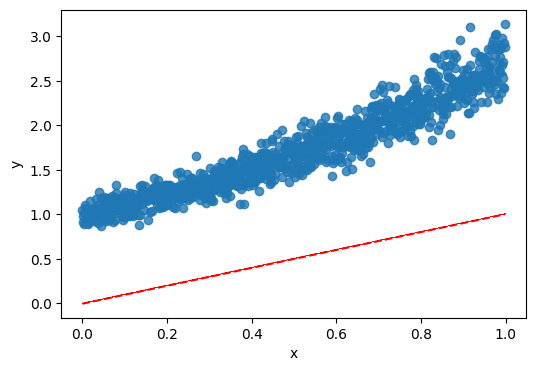

In [22]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

#### Então como eu calculo o R^2 no dado original?

In [23]:
df['pred_y'] = np.exp(reg.fittedvalues)

df[['pred_y', 'y']].corr().iloc[0,1]**2

0.922545555957272

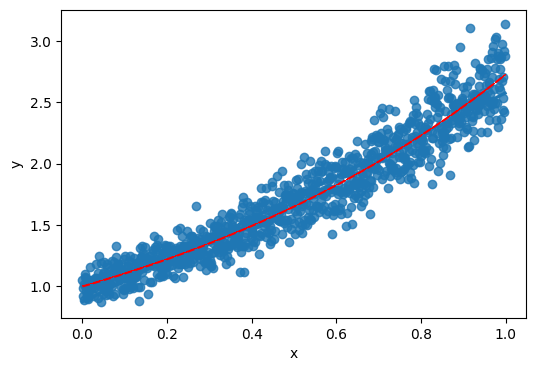

In [24]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], df['pred_y'], 'r,--')